## Twitter Sentiment Classification

**Dataset**
https://www.kaggle.com/saurabhshahane/twitter-sentiment-dataset

In [1]:
# importing various libraries
import pandas as pd                
import numpy as np                # for mathematical operations
import matplotlib.pyplot as plt   # for visualizations
import seaborn as sns             # for visualizations
import tensorflow as tf           # open source library by google

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# so that the visualization labels are clearly visible in monkai (dark) theme

In [2]:
# loading the dataset
df = pd.read_csv("C:\\Users\sneeg\Desktop\Twitter Sentiment Classification\Twitter_Data.csv")
df

clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]

In [3]:
# checking the shape of the dataset
df.shape

(162980, 2)

In [4]:
# getting all the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [5]:
df.sample()

clean_text  category
57037  ofc credit goes isro you twat but who says yes...       0.0

### Data Preprocessing

In [6]:
# checking for null values in the data set
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [7]:
df.category.unique()

array([-1.,  0.,  1., nan])

In [8]:
# fetching values in which sentiment(category) column is null
df[df['category'].isna()]

clean_text  category
130448  the foundation stone northeast gas grid inaugu...       NaN
155642  dear terrorists you can run but you cant hide ...       NaN
155698  offense the best defence with mission shakti m...       NaN
155770  have always heard politicians backing out thei...       NaN
158693  modi government plans felicitate the faceless ...       NaN
159442               chidambaram gives praises modinomics       NaN
160559  the reason why modi contested from seats 2014 ...       NaN

In [9]:
# fetching values in which clean_text column is null
df[df['clean_text'].isna()]

clean_text  category
148           NaN       0.0
158694        NaN      -1.0
159443        NaN       0.0
160560        NaN       1.0

In [10]:
# dropping the null values
df.drop(df[df['clean_text'].isna()].index, inplace=True)
df.drop(df[df['category'].isna()].index, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\sneeg\anaconda3\python.exe -m pip install --upgrade pip' command.


In [13]:
# importing WordCloud - for visualizations
from wordcloud import WordCloud
import nltk   # library for performing text preprocessing task
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneeg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Some Visualizations

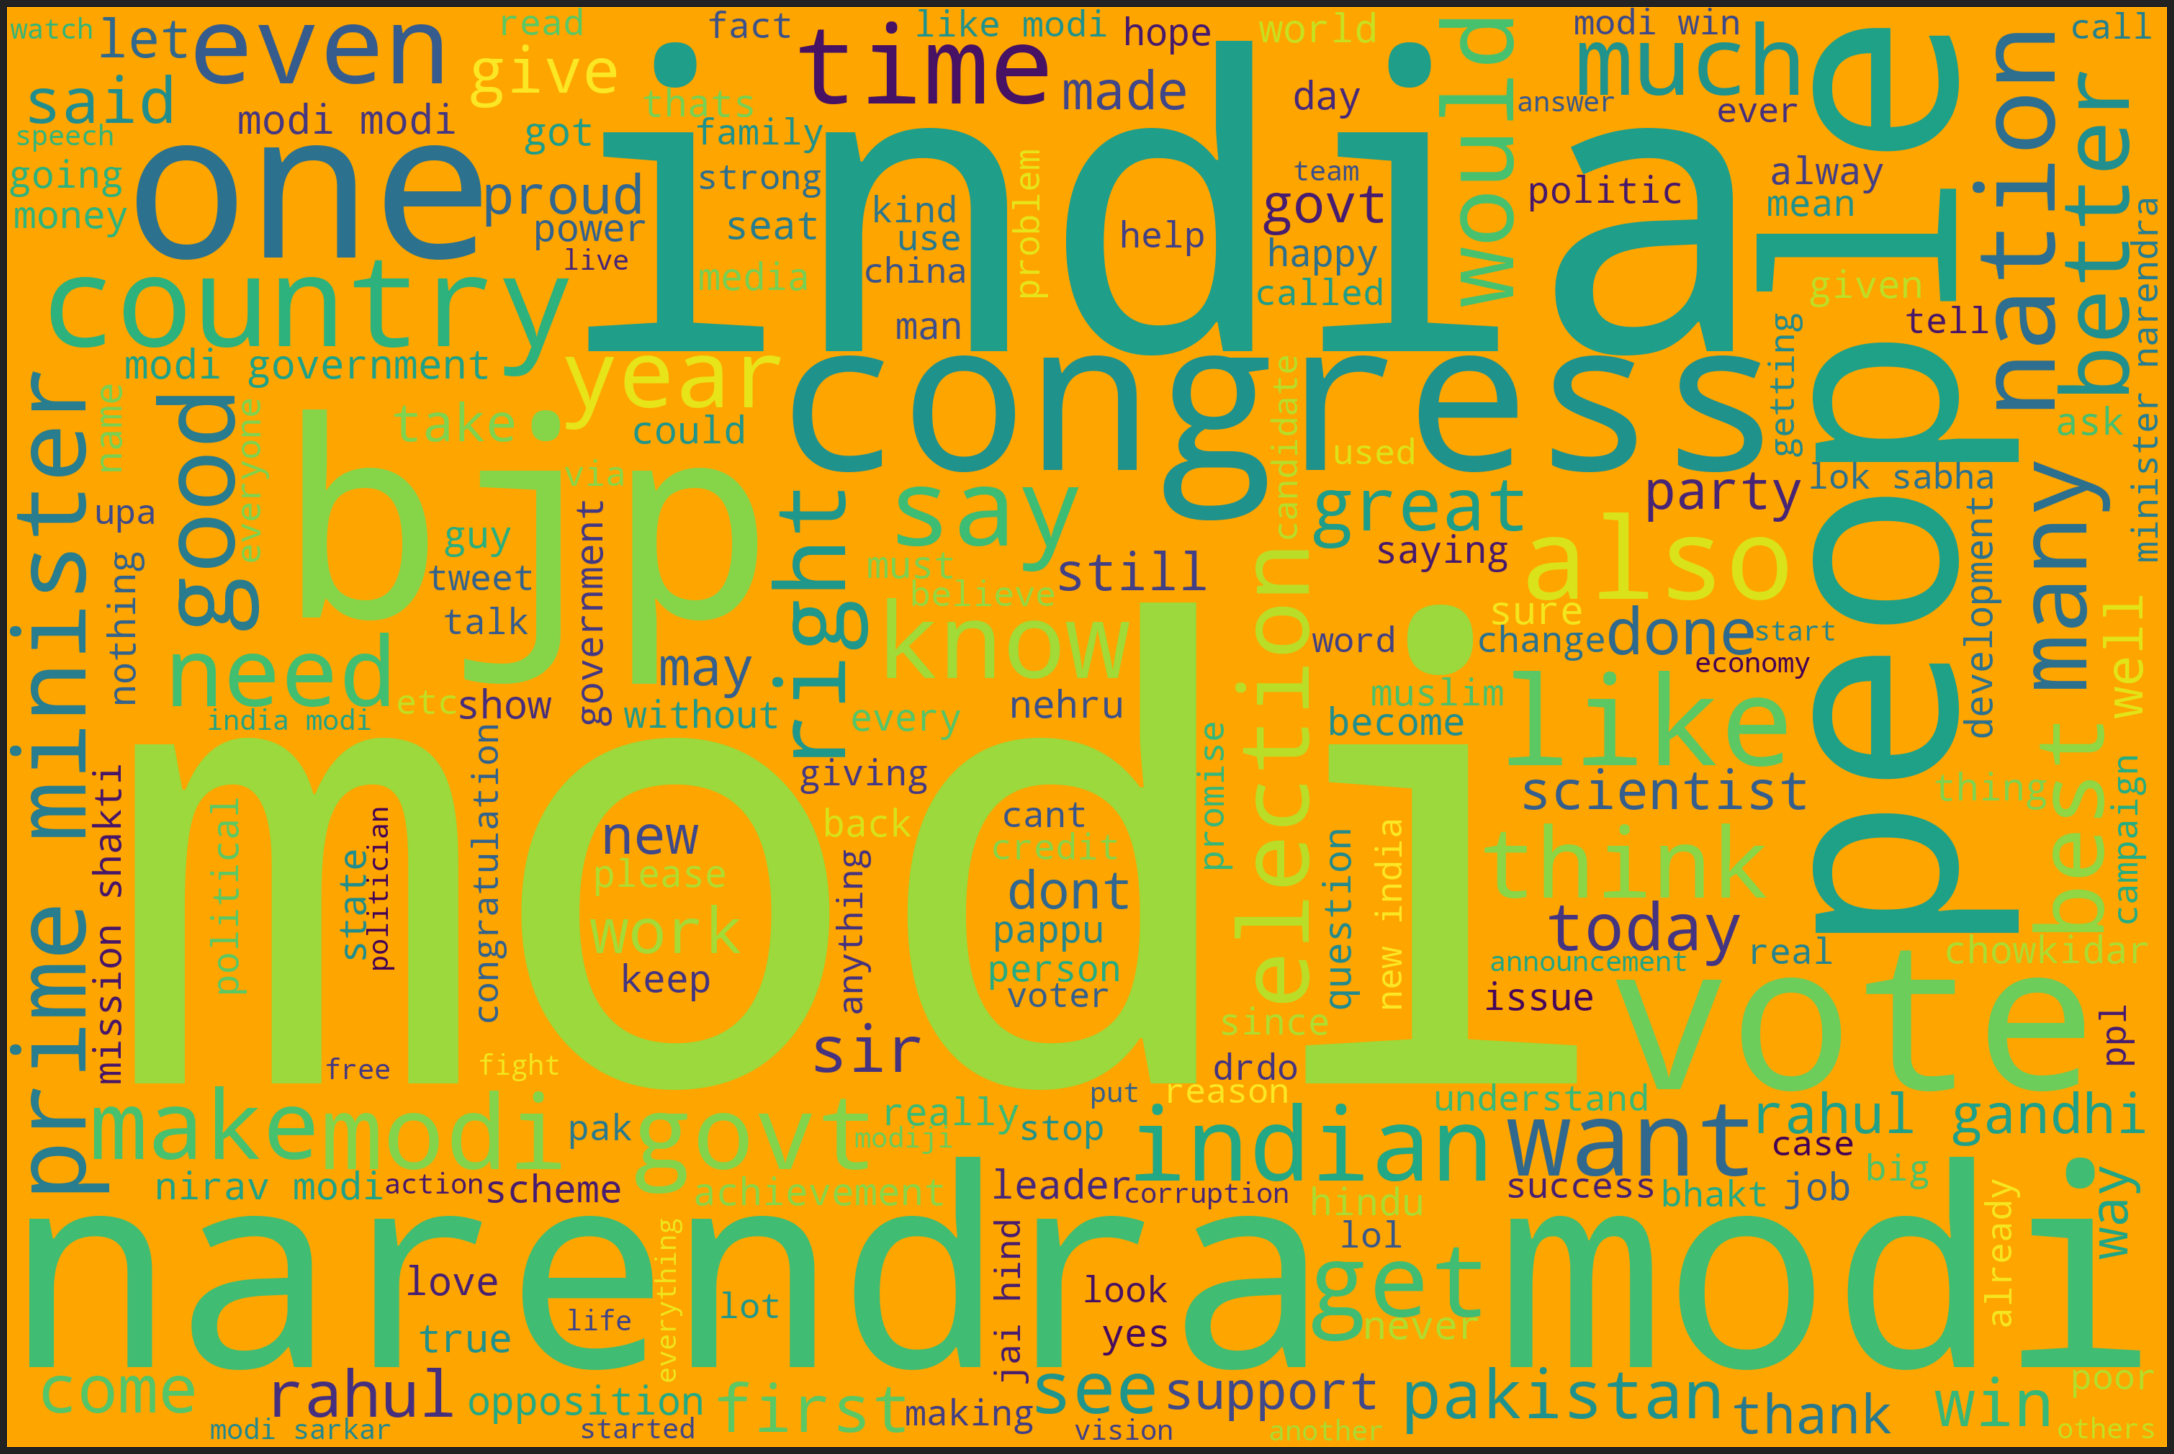

In [14]:
# Wordcloud viz of positive tweets
text = ''
for tweet in df[df['category'] == 1.0]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(width=3000, height=2000, background_color='orange',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(30,20), facecolor='k',edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show
del text

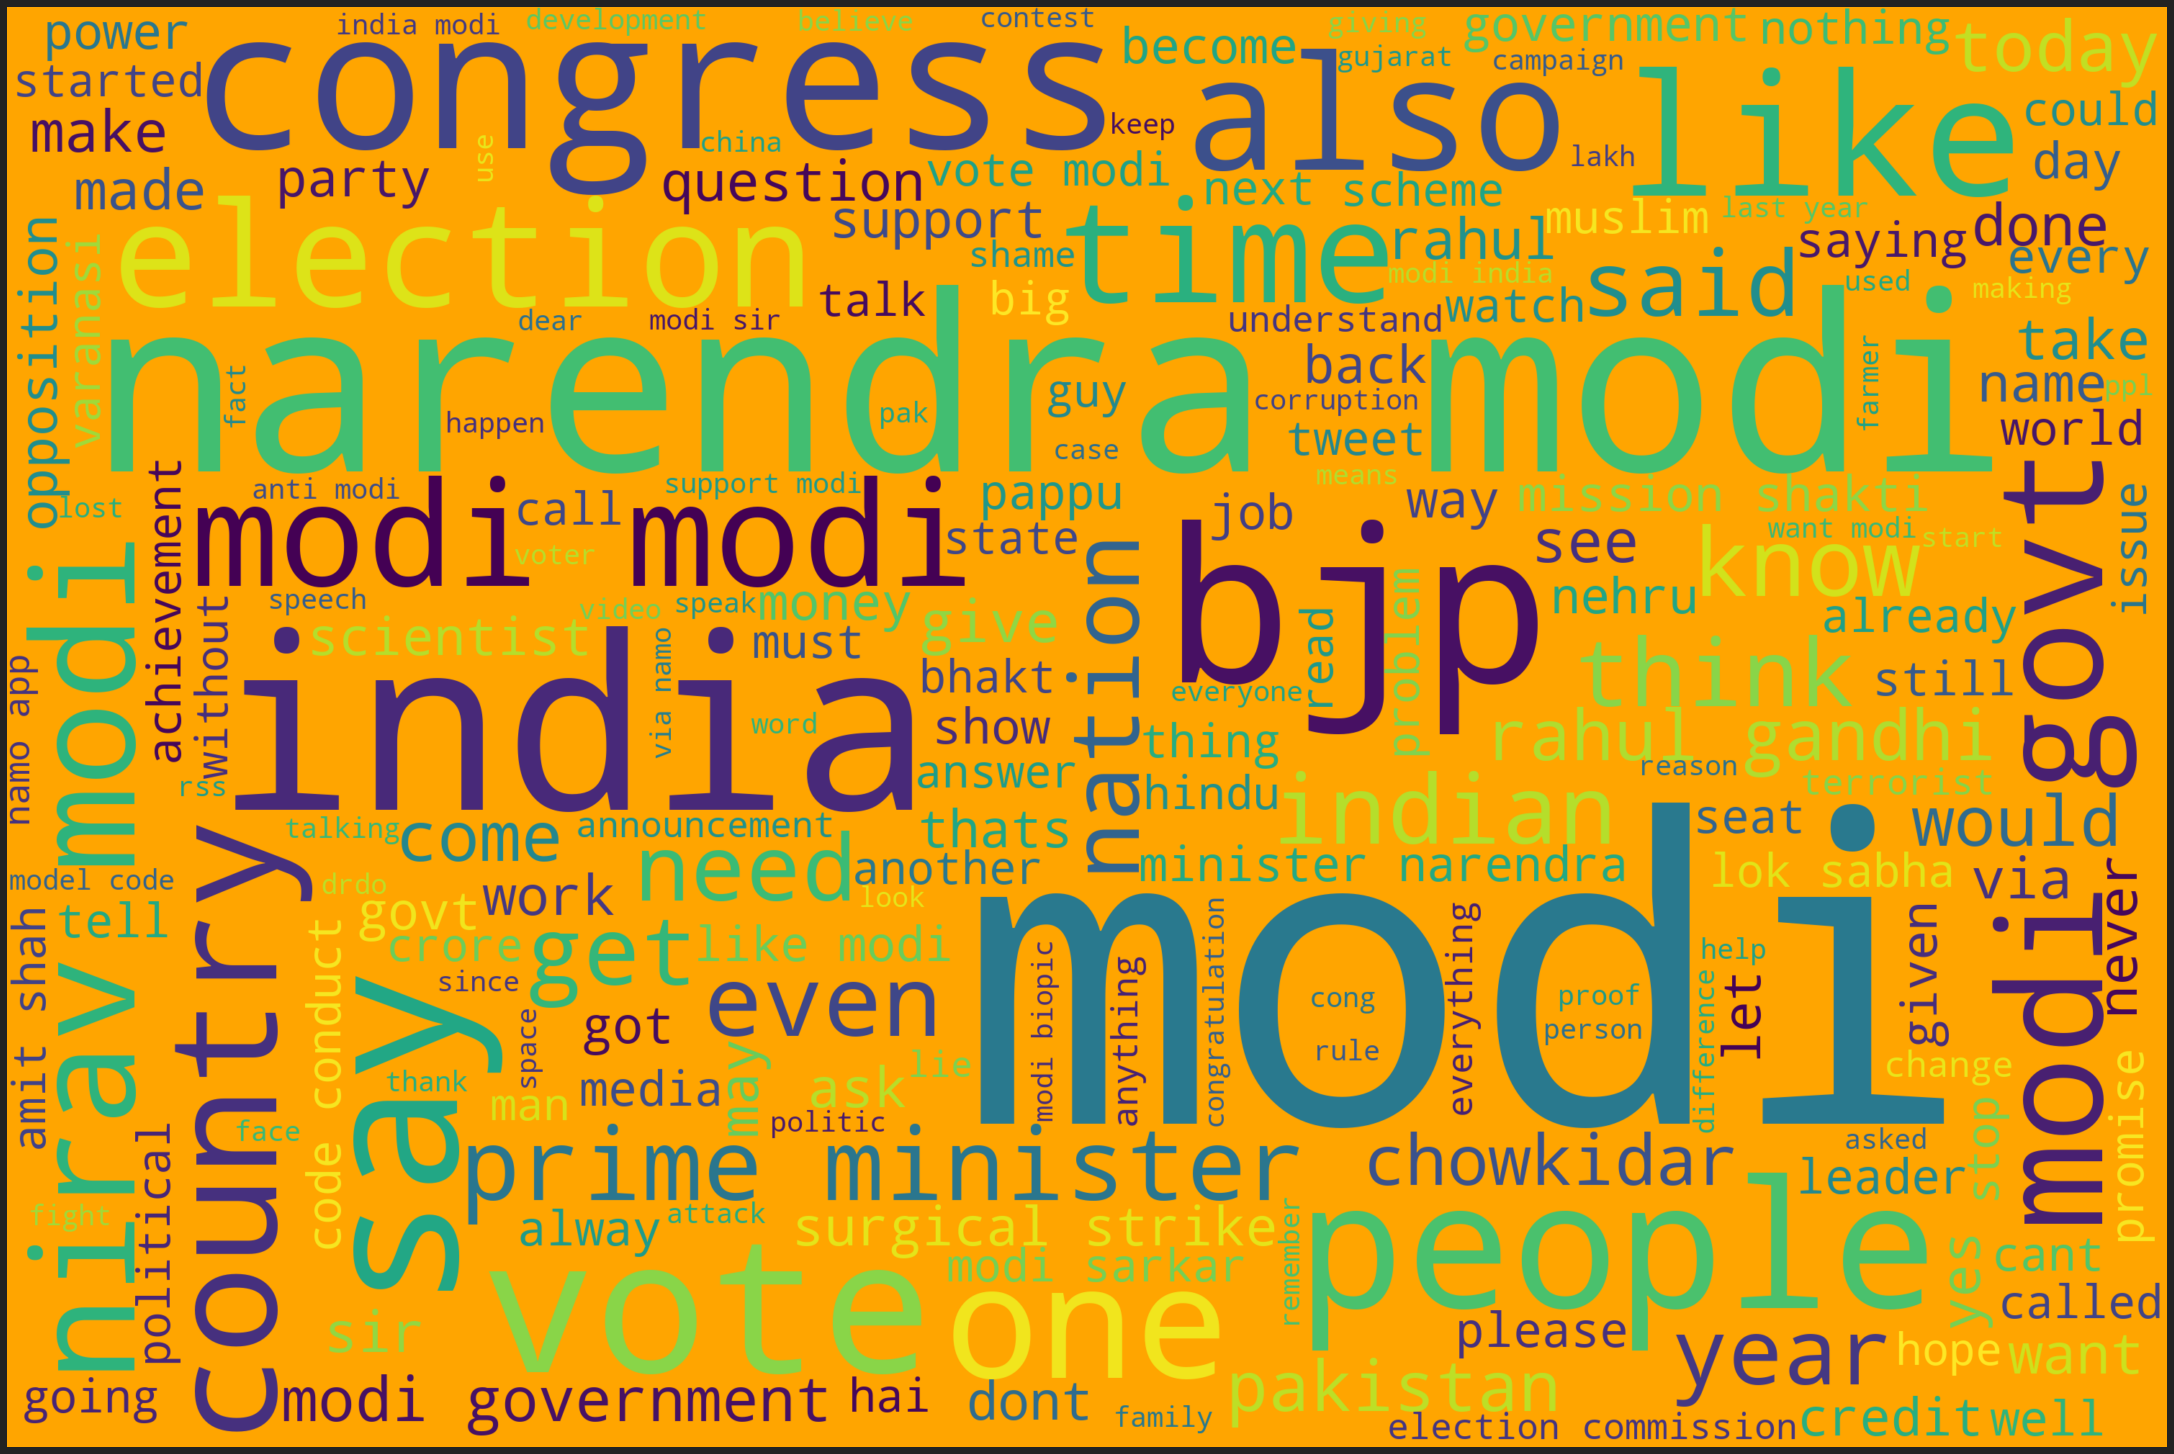

In [15]:
# Wordcloud viz of neutral tweets
text = ''
for tweet in df[df['category'] == 0.0 ]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(width=3000, height=2000, background_color='orange',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(30,20), facecolor='k',edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show
del text

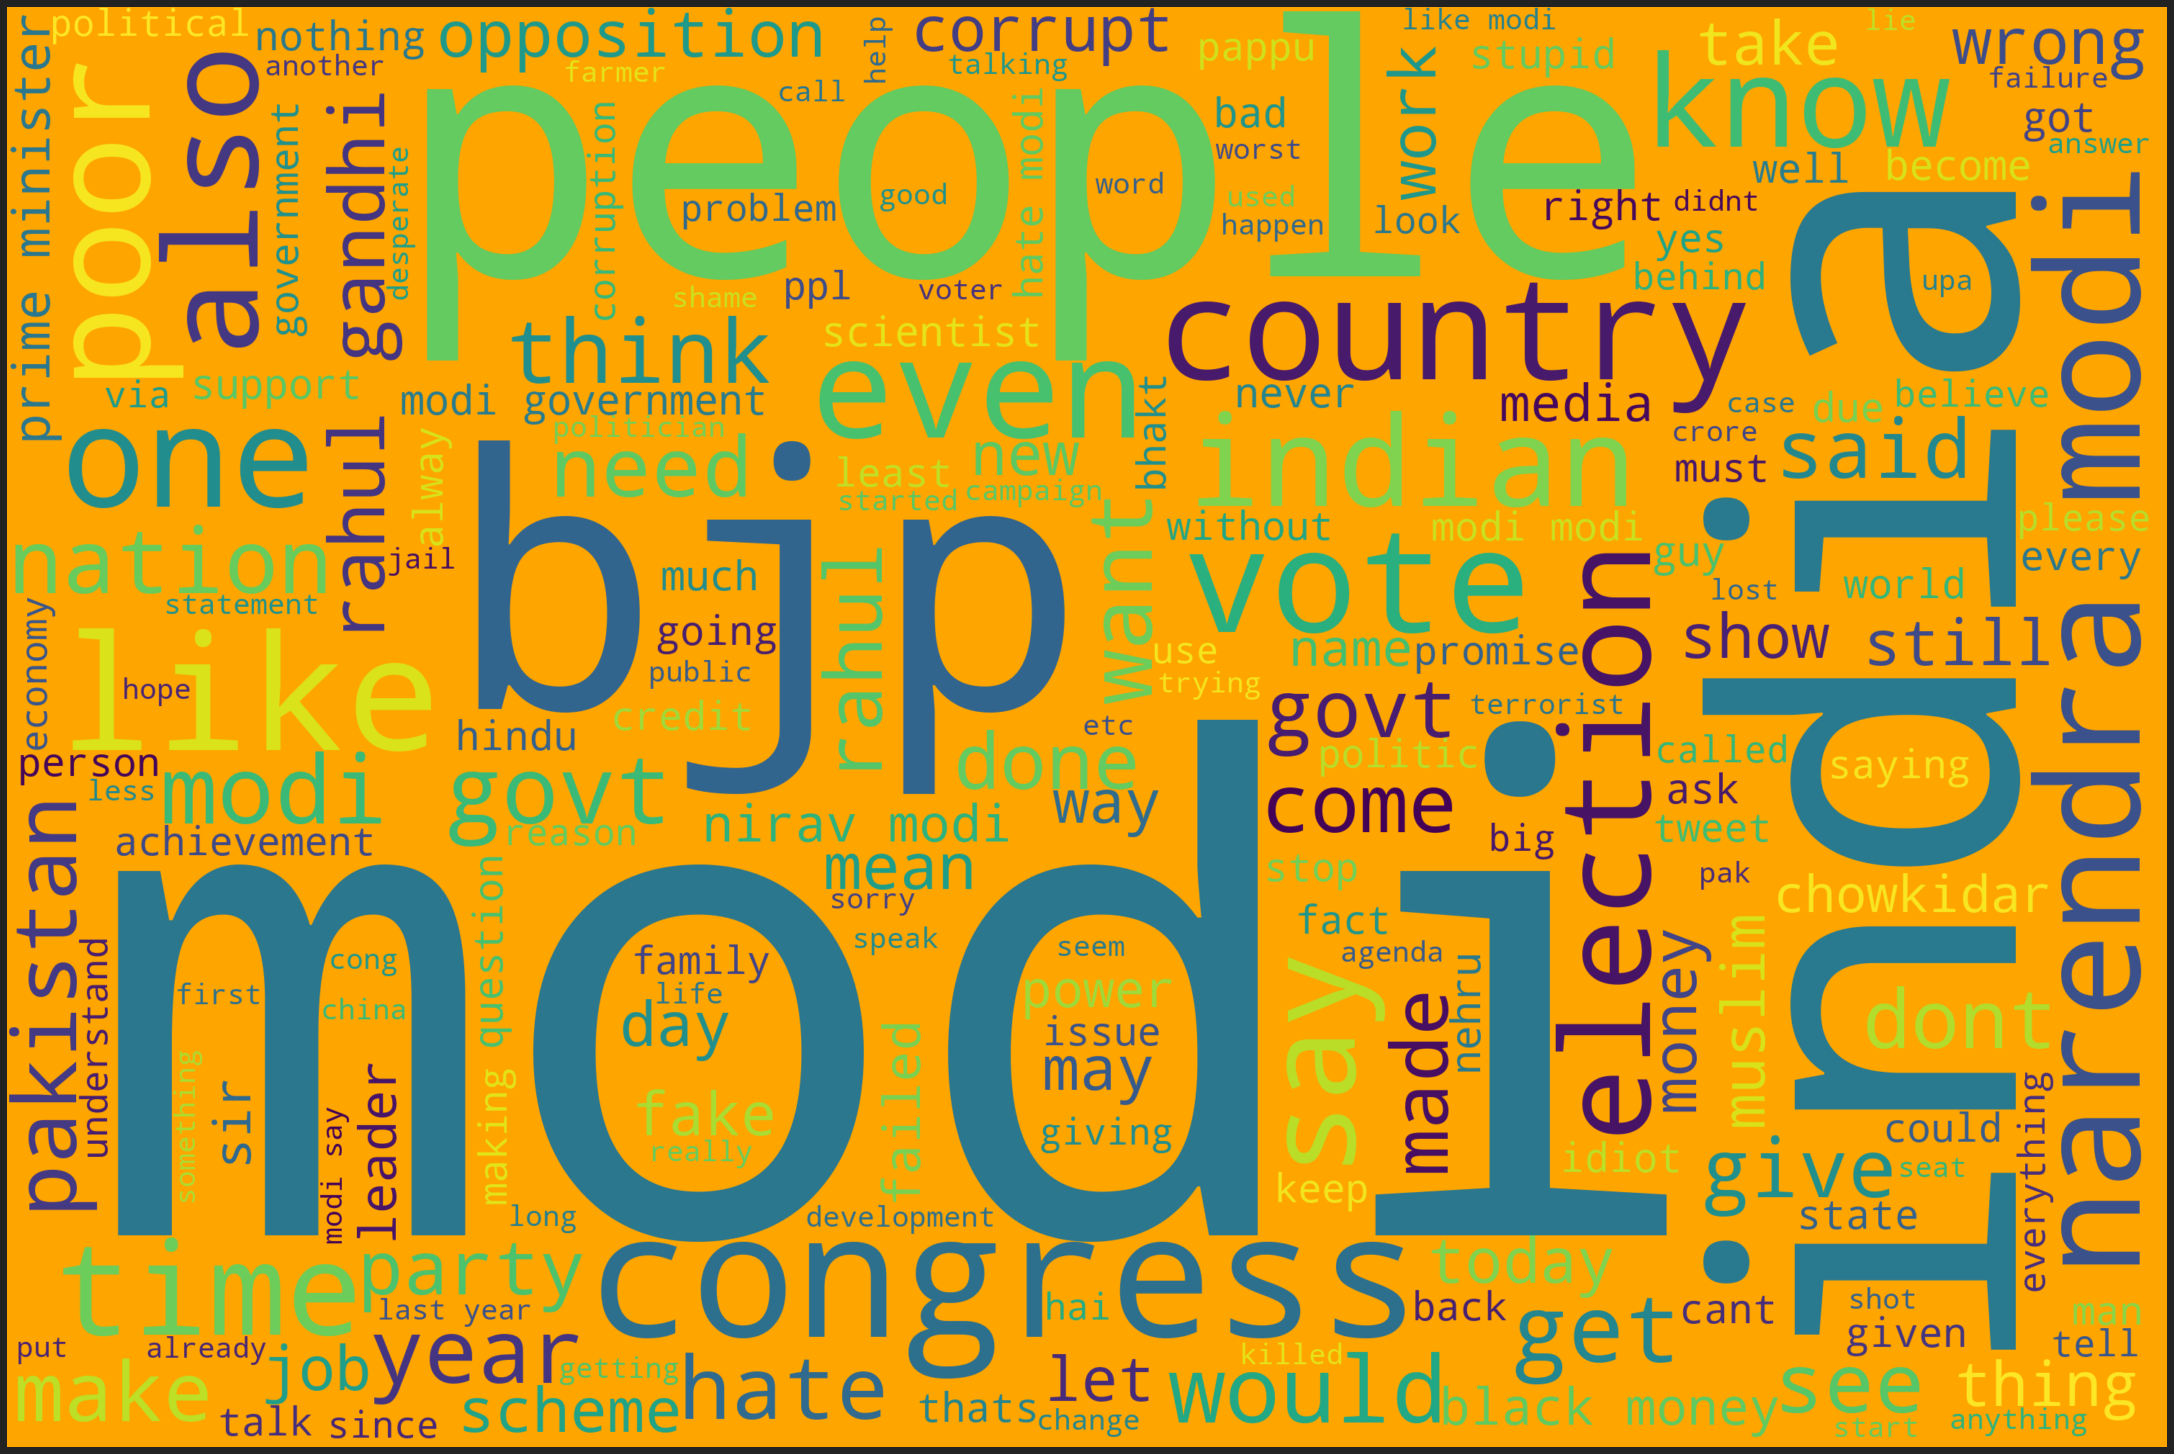

In [16]:
# Wordcloud viz of negative tweets
text = ''
for tweet in df[df['category'] == -1.0 ]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(width=3000, height=2000, background_color='orange',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(30,20), facecolor='k',edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show
del text

### Using Count vectorizer and One vs rest approach


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold

In [25]:
vec = CountVectorizer(max_features = 10000)
vec.fit(df['clean_text'])

trn, val = train_test_split(df, test_size = 0.3, random_state = 42)

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

Since the model doesn’t accept textual data and only understands numbers, data needs to be vectorized


In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

0.948947659078358

In [20]:
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
accuracy_score(val['category'], val_preds)

0.948947659078358

In [21]:
confusion_matrix(val['category'], val_preds)

array([[ 9572,   264,   855],
       [  198, 16215,   231],
       [  687,   261, 20608]], dtype=int64)

In [22]:
# Checking performance of model with classification report
print(classification_report(val['category'], val_preds))

              precision    recall  f1-score   support

        -1.0       0.92      0.90      0.91     10691
         0.0       0.97      0.97      0.97     16644
         1.0       0.95      0.96      0.95     21556

    accuracy                           0.95     48891
   macro avg       0.94      0.94      0.94     48891
weighted avg       0.95      0.95      0.95     48891



### Tfidf Vectorizer

used for a wide range of tasks including text classification, clustering / topic-modeling, search, keyword extraction

In [26]:
vec = TfidfVectorizer(max_features = 10000)
_ = vec.fit(list(df['clean_text']))

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

In [31]:
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs = -1))
_ = clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average = 'micro')

In [28]:
print(clf.score(val_abs, val['category']))

0.9445501216992903


### Word Embeddings

Technique where individual words of a domain/language are represented as real-valued vectors in a lower dimensional space

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [29]:
# tokenize
tok = Tokenizer(num_words = 1000000)
# fit
tok.fit_on_texts(df['clean_text'].str.lower().tolist())
vocab_size = len(tok.word_index) + 1

In [30]:
X_trn = tok.texts_to_sequences(trn['clean_text'])
X_val = tok.texts_to_sequences(val['clean_text'])

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM

In [35]:
maxlen = 200
X_trn = pad_sequences(X_trn, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

In [36]:
embedding_dim = 50
vocab_size = len(tok.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(200, activation='relu', name = 'Fully_Connected'))
model.add(Dense(1, activation='sigmoid', name = 'Output'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3), loss = 'binary_crossentropy',metrics = ['accuracy'],)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 50)           5683950   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
Fully_Connected (Dense)      (None, 200)               2000200   
_________________________________________________________________
Output (Dense)               (None, 1)                 201       
Total params: 7,684,351
Trainable params: 7,684,351
Non-trainable params: 0
_________________________________________________________________


C:\Users\sneeg\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [37]:
model.fit(X_trn, trn['category'], validation_data=(X_val, val['category']), verbose = True, epochs = 20, batch_size = 256,
          callbacks = [tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/20
446/446 [==============================] - 43s 94ms/step - loss: -27.7826 - accuracy: 0.5087 - val_loss: -144.3587 - val_accuracy: 0.5551
Epoch 2/20
446/446 [==============================] - 43s 97ms/step - loss: -783.8367 - accuracy: 0.5638 - val_loss: -1597.8196 - val_accuracy: 0.5799
Epoch 3/20
446/446 [==============================] - 44s 98ms/step - loss: -3810.1272 - accuracy: 0.5654 - val_loss: -5477.1401 - val_accuracy: 0.5570
Epoch 4/20
446/446 [==============================] - 43s 96ms/step - loss: -10204.8789 - accuracy: 0.5649 - val_loss: -12406.9912 - val_accuracy: 0.5714
Epoch 5/20
446/446 [==============================] - 41s 92ms/step - loss: -20656.0879 - accuracy: 0.5661 - val_loss: -22764.2539 - val_accuracy: 0.5441
Epoch 6/20
446/446 [==============================] - 41s 92ms/step - loss: -35631.6758 - accuracy: 0.5654 - val_loss: -36908.5859 - val_accuracy: 0.5409
Epoch 7/20
446/446 [==============================] - 41s 91ms/step - loss: -55520.304